In [1]:
# Churn Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [3]:
data = pd.read_csv('/Users/auliaazmi/Downloads/dataset-churn.csv')

In [4]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
## Preprocessing

In [8]:
data = data.drop('customerID', axis =1)

In [9]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
## Encoding

In [12]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

In [13]:
def get_categorical_columns(df):
    return [column for column in df.columns if df.dtypes[column]=='object']

In [14]:
get_uniques(data, get_categorical_columns(data))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'TotalCharges': ['29.85',
  '1889.5',
  '108.15',
  '1840.75',
  '151.65',
  '820.5',
  '1949.4',
  '301.9',
  '3046.05',
  '3487.95',
  '587.45',
  '326.8',
  '5681.1',
  '5036.3',
  '2686.05',
  '7895.15',
  '1022.95',
  '7382

In [15]:
sorted(data['TotalCharges'].unique())

[' ',
 '100.2',
 '100.25',
 '100.35',
 '100.4',
 '100.8',
 '100.9',
 '1001.2',
 '1001.5',
 '1003.05',
 '1004.35',
 '1004.5',
 '1004.75',
 '1005.7',
 '1006.9',
 '1007.8',
 '1007.9',
 '1008.55',
 '1008.7',
 '1009.25',
 '101.1',
 '101.45',
 '101.65',
 '101.9',
 '1010',
 '1011.05',
 '1011.5',
 '1011.8',
 '1012.4',
 '1013.05',
 '1013.2',
 '1013.35',
 '1013.6',
 '1014.25',
 '1016.7',
 '1017.35',
 '102.45',
 '102.5',
 '102.75',
 '1020.2',
 '1020.75',
 '1021.55',
 '1021.75',
 '1021.8',
 '1022.5',
 '1022.6',
 '1022.95',
 '1023.75',
 '1023.85',
 '1023.9',
 '1023.95',
 '1024',
 '1024.65',
 '1024.7',
 '1025.05',
 '1025.15',
 '1025.95',
 '1026.35',
 '1027.25',
 '1028.75',
 '1028.9',
 '1029.35',
 '1029.75',
 '1029.8',
 '103.7',
 '1031.1',
 '1031.4',
 '1031.7',
 '1032',
 '1032.05',
 '1033',
 '1033.9',
 '1033.95',
 '1035.5',
 '1035.7',
 '1036',
 '1036.75',
 '1037.75',
 '1039.45',
 '104.2',
 '104.3',
 '1041.8',
 '1042.65',
 '1043.3',
 '1043.35',
 '1043.4',
 '1043.8',
 '1045.25',
 '1046.1',
 '1046.2',
 

In [16]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.NaN)

In [17]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
data['TotalCharges'] = data['TotalCharges'].astype(np.float)

/var/folders/hl/ydncxj4n49xcv0c4255x0wyw0000gn/T/ipykernel_1862/2843058798.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['TotalCharges'] = data['TotalCharges'].astype(np.float)


In [19]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [20]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
data['TotalCharges'].dtype

dtype('float64')

In [22]:
repCol = ['OnlineSecurity',
'OnlineBackup',
'DeviceProtection',
'TechSupport',
'StreamingTV',
'StreamingMovies']
    
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')

data[repCol] = data[repCol].replace('No internet service', 'No')

In [23]:
get_uniques(data, get_categorical_columns(data))

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes'],
 'OnlineBackup': ['Yes', 'No'],
 'DeviceProtection': ['No', 'Yes'],
 'TechSupport': ['No', 'Yes'],
 'StreamingTV': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

In [24]:
binary_feature = ['gender', 'Partner', 'Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
ordinal_features = ['InternetService', 'Contract']
nominal_features = ['PaymentMethod']
target_column = ['Churn']

In [25]:
internet_ordering = ['No','DSL','Fiber optic']
contract_ordering = ['Month-to-month', 'One year', 'Two year']

In [26]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop(column, axis = 1)
    return df

In [27]:
yes_features = binary_feature
print(yes_features)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


In [28]:
yes_features.remove('gender')
print(yes_features)

['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


In [29]:
data = binary_encode(data, 'gender', 'Male')

for feature in yes_features:
    data = binary_encode(data, feature, 'Yes')
    
data = ordinal_encode(data, 'InternetService', internet_ordering)
data = ordinal_encode(data, 'Contract', contract_ordering)

data = onehot_encode(data, 'PaymentMethod')

In [30]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,29.85,29.85,No,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,56.95,1889.50,No,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,53.85,108.15,Yes,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,42.30,1840.75,No,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,70.70,151.65,Yes,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,84.80,1990.50,No,0,0,0,1
7039,0,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,103.20,7362.90,No,0,1,0,0
7040,0,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,29.60,346.45,No,0,0,1,0
7041,1,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,74.40,306.60,Yes,0,0,0,1


In [31]:
data = binary_encode(data, 'Churn', 'Yes')

In [32]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,29.85,29.85,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,56.95,1889.50,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,53.85,108.15,1,0,0,0,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,84.80,1990.50,0,0,0,0,1
7039,0,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,103.20,7362.90,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,29.60,346.45,0,0,0,1,0
7041,1,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,74.40,306.60,1,0,0,0,1


In [33]:
## Splitting and Scaling

In [34]:
y = data['Churn']
X = data.drop('Churn', axis=1)

In [35]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [37]:
## Training

In [38]:
X.shape

(7043, 22)

In [39]:
y.shape

(7043,)

In [40]:
y.sum()/len(y)

0.2653698707936959

In [61]:
inputs = tf.keras.Input(shape=(22,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)

batch_size = 64
epochs = 5

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

In [62]:
history

In [42]:
## Result

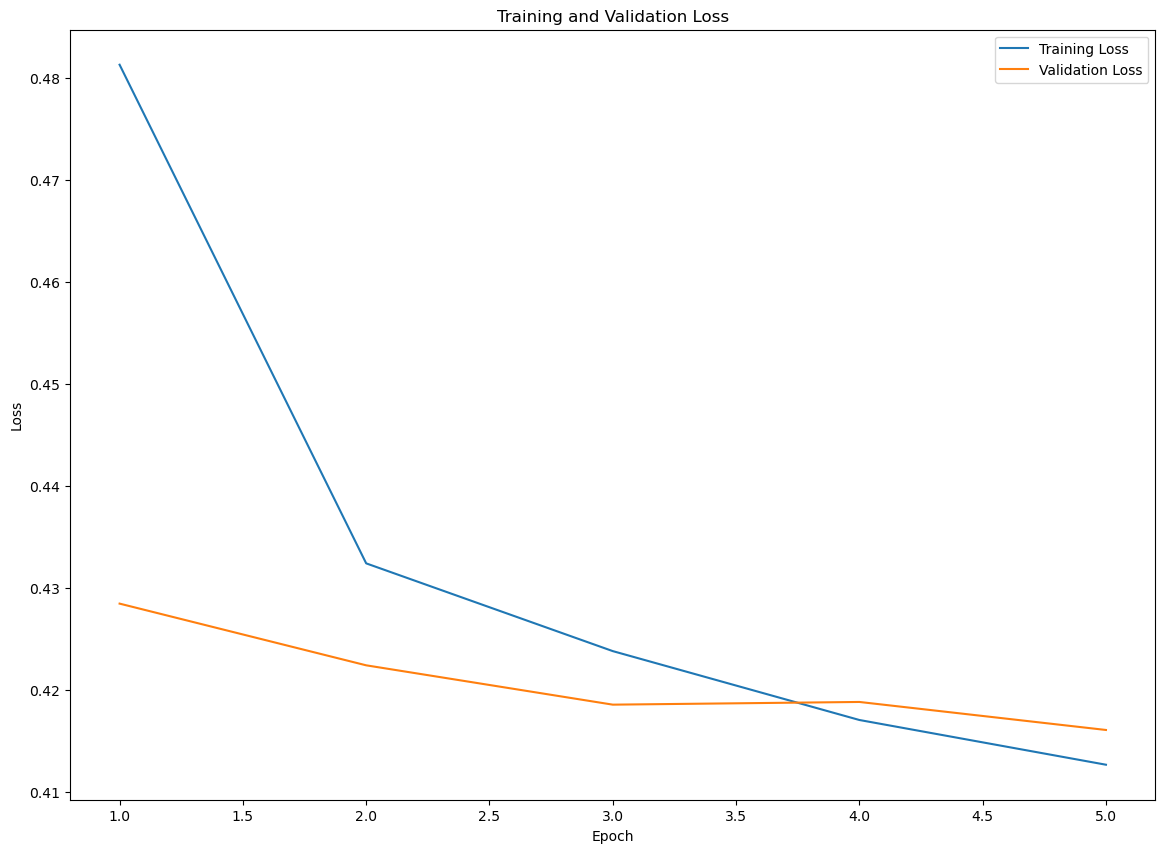

In [63]:
plt.figure(figsize=(14,10))

epochs_range = range(1, epochs+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [64]:
np.argmin(val_loss)

4

In [65]:
model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 629us/step - loss: 0.4147 - auc: 0.8478


[0.4147484004497528, 0.8477802276611328]

In [66]:
yp = model.predict(X_test)
yp[:5]

67/67 [==============================] - 0s 410us/step


array([[0.08915924],
       [0.13491361],
       [0.7583727 ],
       [0.7098136 ],
       [0.1940135 ]], dtype=float32)

In [67]:
y_test[:5]

2559    0
6548    0
3340    1
5943    1
6222    0
Name: Churn, dtype: int64

In [69]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [70]:
y_pred[:5]

[0, 0, 1, 1, 0]

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1553
           1       0.66      0.57      0.62       560

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



Text(95.72222222222221, 0.5, 'Truth')

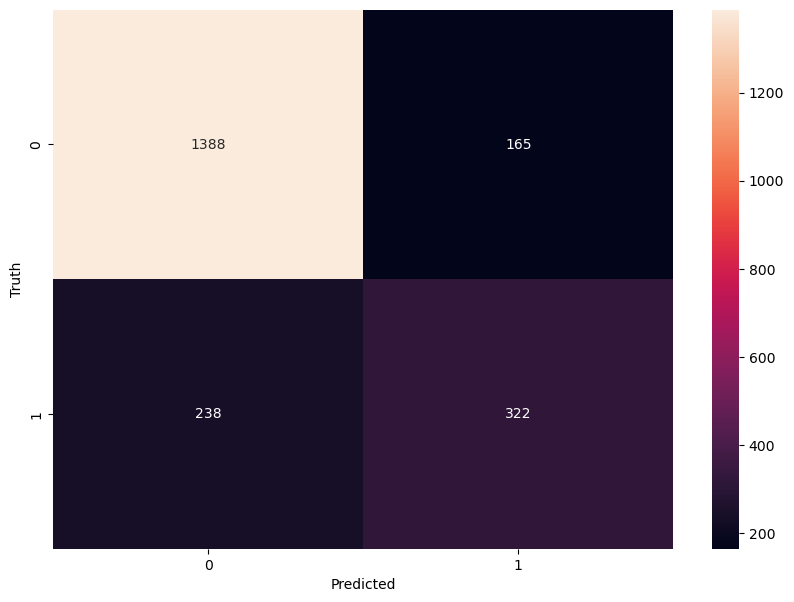

In [75]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
round((1388+322)/(1388+322+238+165),2)

0.81